# Configured Simulation
This notebook is dedicated to presenting how the simulation can operate without writing lines of code in preparation. As opposed to the Manual_Simulation notebook, the simulation environment's required data is extracted from prepared JSON files.

## Create a Setting Folder
The folder data, located in the project's main directory, consists of four major parts: json, figure, pickle, and sql. The sql, as appears of its name, is related to the simulation database. The json folder is used to prepare the simulator's configuration files. By opening the json folder, you will see some samples already designed and placed there. These are some experimental configuration files for the simulation.

For instance, open the folder named 'test'. Under this folder, there are three .json files, which are explained below.
* Population_Generator.json: This file consists of the information required to build an entire population generator object. You can open the JSON files and see the hierarchy for yourself.
* Disease_Properties.json: This file consists of the information required to build an entire disease properties object. Parameters like the infectious rate and immunity are subfields of this JSON file.
* Simulator.json: This file consists of the data required to call the simulate function in the Simulator class. This data includes end_time, spread_period, commands, etc.

### Customized JSON Files
To build your customized settings, copy the folder named 'test', and paste it as a new folder, and name it as you like. For instance, here, we create a copy and call it 'configured_test'.

In [1]:
import os
import sys
sys.path.insert(1, os.path.join(os.pardir, 'src'))

# Check if we are in test folder right now
print(f'Current directory: {os.getcwd()}')

# Change directory to 'data' and then to 'json' folder
os.chdir(os.path.join(os.pardir, 'data', 'json'))

# Check if we are in test folder right now
print(f'Current directory after changing path to json folder: {os.getcwd()}')

Current directory: /home/amin/Projects/Covid/covid19_simulator/example
Current directory after changing path to json folder: /home/amin/Projects/Covid/covid19_simulator/data/json


In [2]:
# Build the configure_test folder if does not exists
try:
    os.mkdir('configured_test')
except FileExistsError:
    pass

# Determine source and destination for copy operation
destination = os.path.join(os.getcwd(), 'configured_test')
source = os.path.join(os.getcwd(), 'test')

# Copy the items in 'test' to 'configured_test'
import shutil
src_files = os.listdir(source)
for file_name in src_files:
    full_file_name = os.path.join(source, file_name)
    if os.path.isfile(full_file_name):
        shutil.copy(full_file_name, destination)

Now, we can try to make some changes in the JSON configuration files. For the sake of simplicity, we just change the population size to 800. This can be done either manually, from an editor, or using a script like the following.

In [19]:
os.getcwd()

'/home/amin/Projects/Covid/covid19_simulator/data'

In [18]:
# Considering the last section, we are now in 'json' folder, so we move to 'data' folder again so that the configured test is accessible.
os.chdir(os.pardir)

# Import and initialize the parser
from json_handle import Parser
parser = Parser(folder_name='configured_test')


In [20]:
# Parse the Population_Generator.json in 'configured_test'
population_generator =  parser.parse_population_generator()
print(f'Population size before the change is: {population_generator.population_size}')

# Change the population size
population_generator.population_size = 800

# Save the new population generator as json
parser.build_json(population_generator)
parser.save_json()

# Parse the Population_Generator.json in 'configured_test'
population_generator =  parser.parse_population_generator()
print(f'Population size after the change is: {population_generator.population_size}')

INFO - population_generator.py - 1295 - __init__ - 2020-12-04 12:55:23,352 - Population Generator created
Population size before the change is: 500
INFO - population_generator.py - 1295 - __init__ - 2020-12-04 12:55:23,363 - Population Generator created
Population size after the change is: 800


## Simulate based on the Configured Data
In this section, we simulate data based on the settings saved inside the 'configured_test' folder.

In [21]:
# Import and initialize the parser
from json_handle import Parser
parser = Parser(folder_name='configured_test')

# Load Simulator from JSON file
simulator = parser.parse_simulator()
simulator.generate_model()

# Check the population size after generation
print(f'Population size is: {len(simulator.people)}')

INFO - population_generator.py - 1295 - __init__ - 2020-12-04 12:55:58,328 - Population Generator created
INFO - disease_manipulator.py - 61 - __init__ - 2020-12-04 12:55:58,334 - Disease Properties generated
INFO - population_generator.py - 1328 - generate_population - 2020-12-04 12:55:58,603 - Jobs required to generate the model: 1

INFO - time_simulator.py - 195 - generate_model - 2020-12-04 12:56:03,801 - Simulation model generated
Population size is: 802


Additionally, the policy and simulation specifics must be obtained from the Simulator.json as described below.

In [22]:
# Load Simulator Data from JSON file
end_time, spread_period, initialized_infected_ids, commands, observers = parser.parse_simulator_data()

# Simulate
simulator.simulate(end_time=end_time,
                    spread_period=spread_period,
                    initialized_infected_ids=initialized_infected_ids,
                    commands=commands,
                    observers=observers)

INFO - time_simulator.py - 336 - simulate - 2020-12-04 12:56:16,477 - Initializing the simulation
INFO - time_simulator.py - 343 - simulate - 2020-12-04 12:56:16,514 - Starting the simulation
INFO - commands.py - 717 - take_action - 2020-12-04 12:56:30,017 - Command executed: Quarantine_All_People

INFO - time_simulator.py - 365 - simulate - 2020-12-04 12:56:41,531 - Simulation completed
INFO - utils.py - 303 - show_people_statistics - 2020-12-04 12:56:41,533 - 
+----------------------------+-------+
|           People           | Count |
+============================+=======+
| Population Size            | 800   |
+----------------------------+-------+
| Confirmed (Active + Close) | 150   |
+----------------------------+-------+
| Total Death Cases          | 5     |
+----------------------------+-------+
| Total Recovered            | 795   |
+----------------------------+-------+
| Currently Active Cases     | 0     |
+----------------------------+-------+
INFO - utils.py - 280 - sh

We have completed the simulation, and the results may be obtained from the database or statistics.

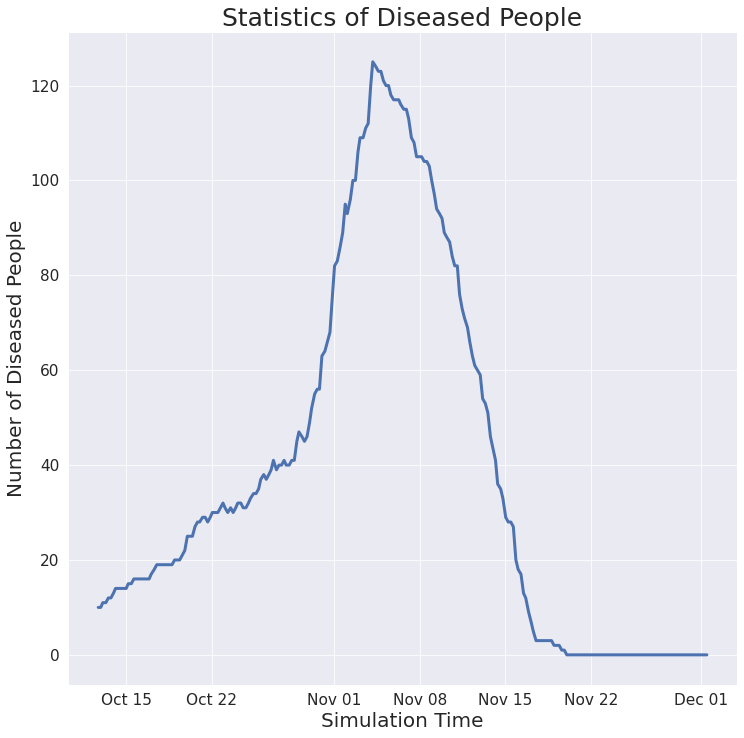

In [24]:
from utils import Health_Condition
observers[0].plot_disease_statistics_during_time(Health_Condition.IS_INFECTED)

Finally, you can have access to a summary of the simulation either by setting the report_statistics option of the simulate function, or separately calling in the statistics class.

In [26]:
simulator.statistics.show_people_statistics(simulator=simulator)

INFO - utils.py - 303 - show_people_statistics - 2020-12-04 12:58:56,722 - 
+----------------------------+-------+
|           People           | Count |
+============================+=======+
| Population Size            | 800   |
+----------------------------+-------+
| Confirmed (Active + Close) | 150   |
+----------------------------+-------+
| Total Death Cases          | 5     |
+----------------------------+-------+
| Total Recovered            | 795   |
+----------------------------+-------+
| Currently Active Cases     | 0     |
+----------------------------+-------+


## The Example Town
In this section, our sample town, implemented under the json folder with 50k population size,
six family patterns, and major communities, including schools and workplaces, gyms, restaurants, and so on, is being tested.

### Parse the Configuration Files
Prior to anything else, we have to parse the configuration files located in the town folder, under data/json directory.

In [28]:
# Import libs
import sys, time, os

sys.path.insert(1, os.path.join(os.pardir, 'src'))

# Import and initialize the parser
from json_handle import Parser
parser = Parser(folder_name='town')

# Load Simulator from JSON file
simulator = parser.parse_simulator()

INFO - population_generator.py - 1295 - __init__ - 2020-12-04 14:20:00,842 - Population Generator created
INFO - disease_manipulator.py - 61 - __init__ - 2020-12-04 14:20:00,844 - Disease Properties generated


### Generate and Save the Model
Since the model obtained by the generate_model function in this simulation is huge, we can utilize the simulator power tp save the model for later use, by employing
the simulator.save_model method, and later use it using the simulator.load_model method.

In [29]:
# Time the generation process
init_generate_model = time.time()

# Generate the simulation model
simulator.generate_model()

# Time the generation process
end_generate_model = time.time()

# Save the simulation model
simulator.save_model('town')

# Save the simulation model
simulator.load_model('town')

# Print the elapsed time
from logging_settings import logger
logger.critical(f'The generate model time is: {end_generate_model - init_generate_model}')

INFO - time_simulator.py - 276 - load_model - 2020-12-04 14:20:20,418 - Simulator model town loaded


### Simulate the Town
After the model is generated, we simulate the town in this section.

In [30]:
# Load Simulator Data from JSON file
end_time, spread_period, initialized_infected_ids, commands, observers = parser.parse_simulator_data()

# Init time
init_time_simulation = time.time()

# Run the simulation
simulator.simulate(end_time=end_time,
                    spread_period=spread_period,
                    initialized_infected_ids=initialized_infected_ids,
                    commands=commands,
                    observers=observers,
                    report_statistics=2)
# End time
end_time_simulation = time.time()

INFO - time_simulator.py - 336 - simulate - 2020-12-04 14:20:30,005 - Initializing the simulation
INFO - time_simulator.py - 343 - simulate - 2020-12-04 14:20:30,066 - Starting the simulation

INFO - time_simulator.py - 365 - simulate - 2020-12-04 14:21:11,867 - Simulation completed
INFO - utils.py - 303 - show_people_statistics - 2020-12-04 14:21:11,869 - 
+----------------------------+-------+
|           People           | Count |
+============================+=======+
| Population Size            | 1000  |
+----------------------------+-------+
| Confirmed (Active + Close) | 819   |
+----------------------------+-------+
| Total Death Cases          | 64    |
+----------------------------+-------+
| Total Recovered            | 936   |
+----------------------------+-------+
| Currently Active Cases     | 80    |
+----------------------------+-------+
INFO - utils.py - 280 - show_simulator_statistics - 2020-12-04 14:21:11,870 - 
+---------------+---------------------+
|   Simulator 

### Evaluate the results
At the end, we present some plots to illustrate the simulation's results.

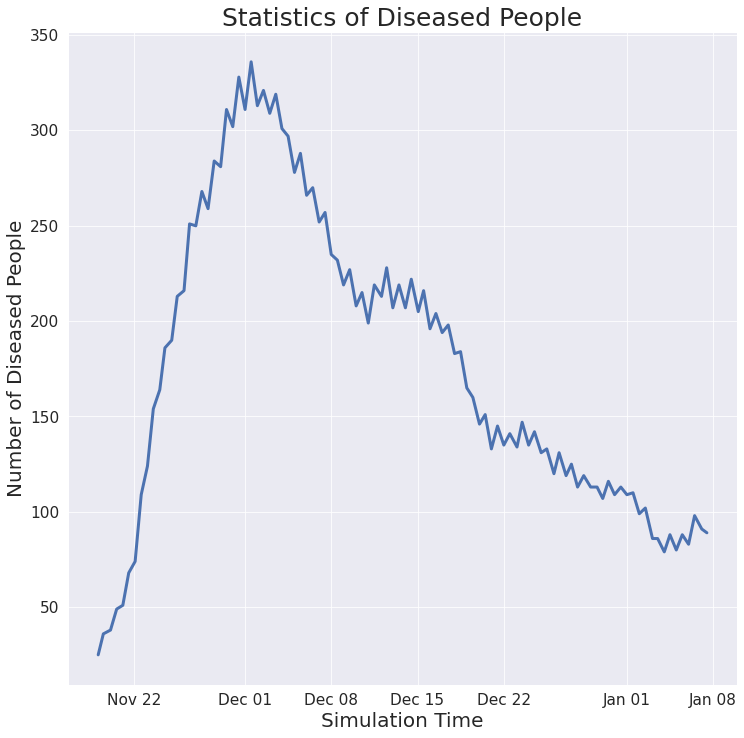

In [31]:
observers[0].plot_disease_statistics_during_time(Health_Condition.IS_INFECTED)


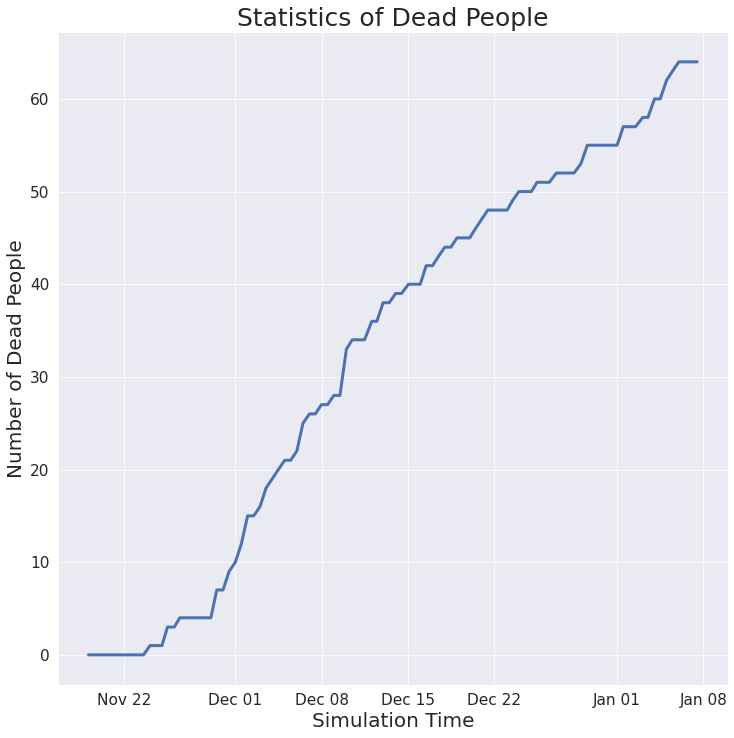

In [32]:
observers[0].plot_disease_statistics_during_time(Health_Condition.DEAD)

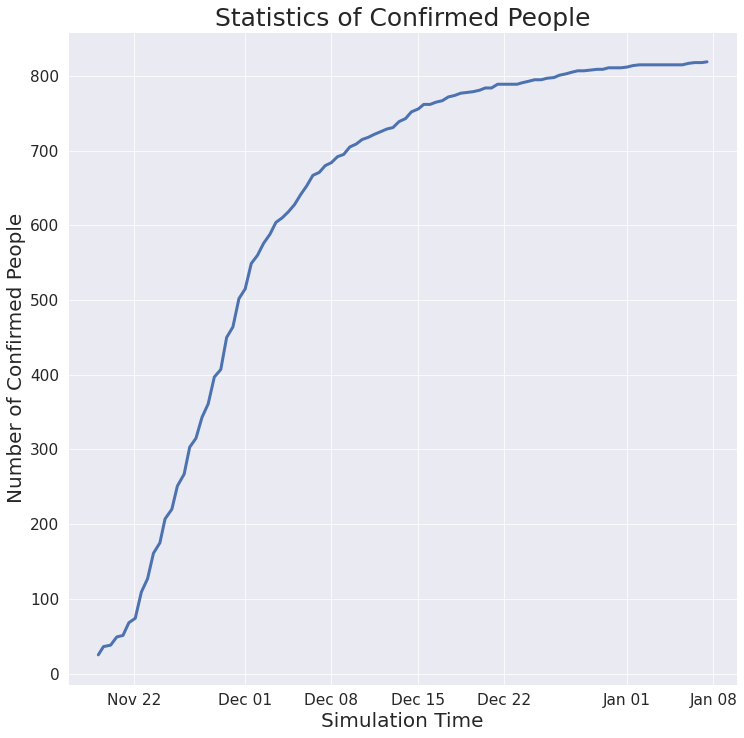

In [33]:
observers[0].plot_disease_statistics_during_time(Health_Condition.HAS_BEEN_INFECTED)


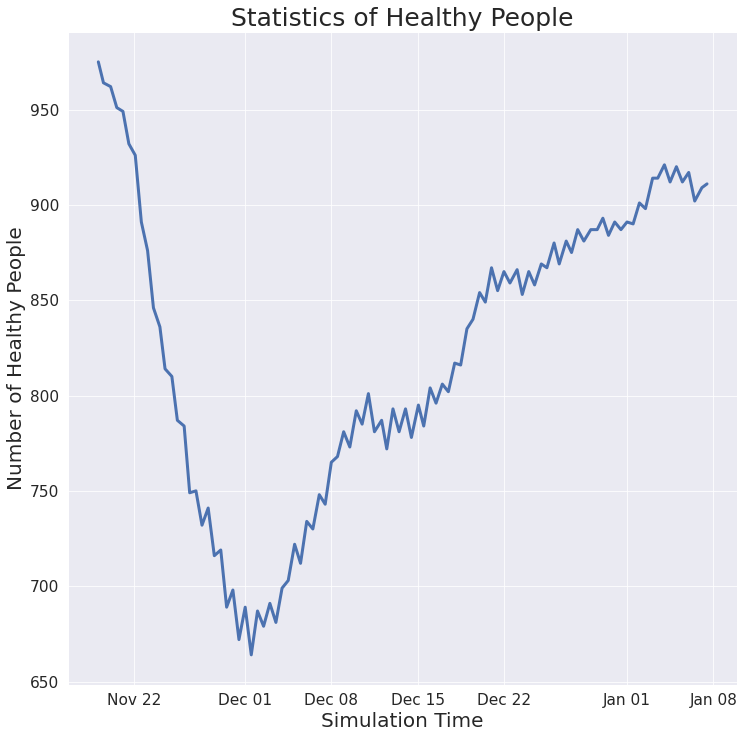

In [34]:
observers[0].plot_disease_statistics_during_time(Health_Condition.IS_NOT_INFECTED)